In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
import keras
from keras.datasets import boston_housing
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Dropout

Using TensorFlow backend.


In [0]:
(x_train_all, y_train_all), (x_test, y_test) = boston_housing.load_data()

In [4]:
x_train_all.shape, y_train_all.shape

((404, 13), (404,))

In [5]:
x_test.shape, y_test.shape

((102, 13), (102,))

In [6]:
scaler = StandardScaler()
scaler.fit(x_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
x_train_all_standard = scaler.transform(x_train_all)

In [0]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all_standard, y_train_all, test_size=0.2, random_state=42)

In [9]:
model = Sequential()
model.add(Dense(128, activation='relu', kernel_initializer='normal', input_shape=(13,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))

optim = keras.optimizers.Adam(lr=1e-3, decay=3e-6)

model.compile(loss='mse',
			  optimizer=optim,
			  metrics=[])

print(model.summary())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         


In [10]:
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=2, mode='auto', baseline=None)
save_best = keras.callbacks.ModelCheckpoint(f"boston_min_valLoss.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

history = model.fit(x_train, y_train,
					batch_size=16,
					epochs=250,
					verbose=2,
					validation_data=(x_valid, y_valid),
                    callbacks=[save_best],
                    )




Train on 323 samples, validate on 81 samples
Epoch 1/250





 - 0s - loss: 613.1607 - val_loss: 468.6655
Epoch 2/250
 - 0s - loss: 599.4691 - val_loss: 440.3841
Epoch 3/250
 - 0s - loss: 503.1808 - val_loss: 278.2317
Epoch 4/250
 - 0s - loss: 229.0598 - val_loss: 60.9208
Epoch 5/250
 - 0s - loss: 129.7042 - val_loss: 46.7949
Epoch 6/250
 - 0s - loss: 97.7649 - val_loss: 31.3999
Epoch 7/250
 - 0s - loss: 93.2861 - val_loss: 27.4904
Epoch 8/250
 - 0s - loss: 80.7219 - val_loss: 26.2440
Epoch 9/250
 - 0s - loss: 89.1081 - val_loss: 22.3606
Epoch 10/250
 - 0s - loss: 78.5833 - val_loss: 24.1815
Epoch 11/250
 - 0s - loss: 82.7709 - val_loss: 20.1858
Epoch 12/250
 - 0s - loss: 63.3445 - val_loss: 16.8532
Epoch 13/250
 - 0s - loss: 77.4749 - val_loss: 18.8052
Epoch 14/250
 - 0s - loss: 69.7705 - val_loss: 18.6971
Epoch 15/250
 - 0s - loss: 77.2012 - val_loss: 18.0183
Epoch 16/250
 - 0s - loss: 67.8783 - val_loss: 18.0346
Epoch 17/250
 - 0s - loss: 72.5984 - val_loss: 18.8131
Epoch 18/250


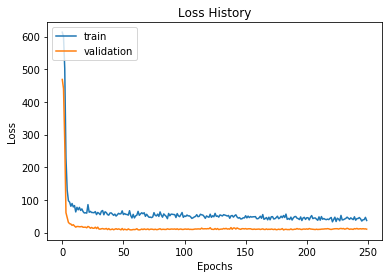

In [11]:
# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss History')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
# plt.savefig("loss_history.png", bbox_inches='tight')
plt.show()

In [0]:
model.load_weights('boston_min_valLoss.h5')

In [13]:
x_test_std = scaler.transform(x_test)
y_test_pred = model.predict(x_test_std)
print(f"Testing mean square error: {metrics.mean_squared_error(y_test, y_test_pred): .3f}")

Testing mean square error:  17.203
